<a href="https://colab.research.google.com/github/Jenniferduong20012004/JennyLearningAI/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#down data from git
!curl -L -o ETTh1.csv https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2528k  100 2528k    0     0  4375k      0 --:--:-- --:--:-- --:--:-- 4375k


In [3]:
data = pd.read_csv ("/content/ETTh1.csv", parse_dates = ['date'])

In [4]:
data.describe() #summarize basic information

HUFL          HULL          MUFL          MULL          LUFL  \
count  17420.000000  17420.000000  17420.000000  17420.000000  17420.000000   
mean       7.375141      2.242242      4.300239      0.881568      3.066062   
std        7.067744      2.042342      6.826978      1.809293      1.164506   
min      -22.705999     -4.756000    -25.087999     -5.934000     -1.188000   
25%        5.827000      0.737000      3.296000     -0.284000      2.315000   
50%        8.774000      2.210000      5.970000      0.959000      2.833000   
75%       11.788000      3.684000      8.635000      2.203000      3.625000   
max       23.643999     10.114000     17.341000      7.747000      8.498000   

               LULL            OT  
count  17420.000000  17420.000000  
mean       0.856932     13.324672  
std        0.599552      8.566946  
min       -1.371000     -4.080000  
25%        0.670000      6.964000  
50%        0.975000     11.396000  
75%        1.218000     18.079000  
max        3.046000     46.007000

In [18]:
student_performance = pd.read_csv("/content/StudentsPerformance.csv")
student_performance.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [19]:
iris = pd.read_csv("/content/Iris.csv")
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [ ]:
#matplotlib.pyplot: có thể điều chỉnh graph, extensice customization nhưng demand nhiều code
#seaborn: simplifies statistical plót
#plotly.express: vẽ đồ thị và có thể tương tác

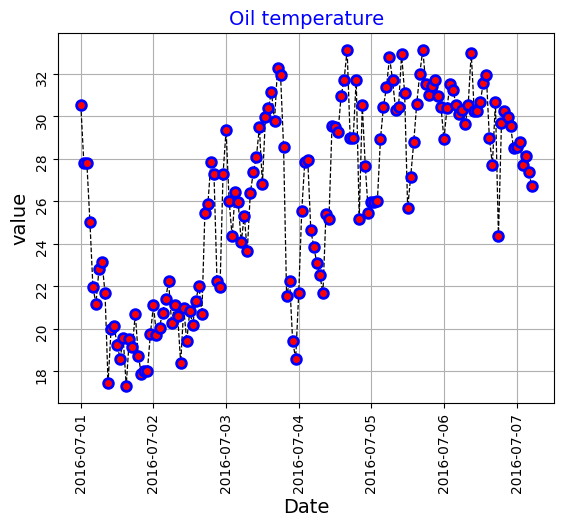

In [ ]:
#Line chart: most common chart used to observe >=1 variables with the change of another variable. Used in trend analysis and time series analysis
plt.plot (data.date[0:150], data.OT[0:150], marker = 'o', color = 'black', linewidth = 0.9, linestyle = '--', markeredgecolor = 'blue', markeredgewidth='2.0', markerfacecolor = 'red', markersize = 7.0 )
plt.title ('Oil temperature', color = 'blue', size = 14)
plt.xlabel ("Date", size = 14)
plt.ylabel ("value", size =14)
plt.style.use("fivethirtyeight")
plt.grid(True) # show grid (duong o ly)
plt.xticks (rotation = 90) #quay x label 90 do
plt.yticks (rotation =90)
plt.show()

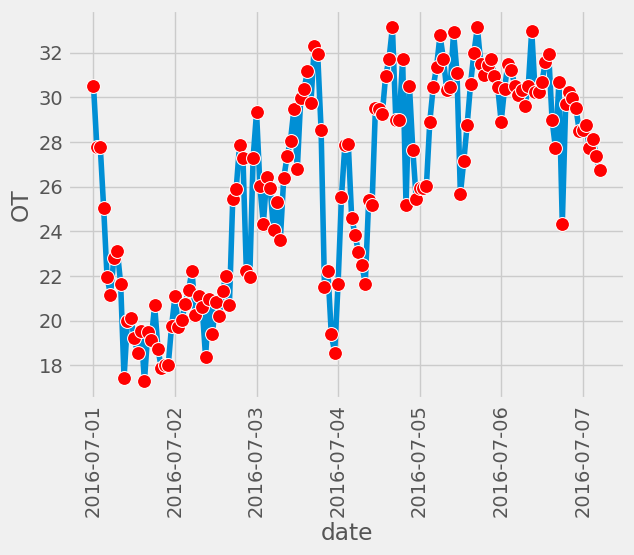

In [ ]:
#dùng seaborn
sns.lineplot (data = data, x = data.date [0:150], y = data.OT [0:150], marker = 'o', markersize = 10, markerfacecolor = 'red')
plt.xticks (rotation = 90)
plt.show()

In [ ]:
#use plotly
fig = px.line (data, x = data.date [0:150], y = data.OT [0:150], title = "Oil temperature", markers = True)
fig.update_layout (xaxis_title = "Date", yaxis_title= "Value")
fig.show()

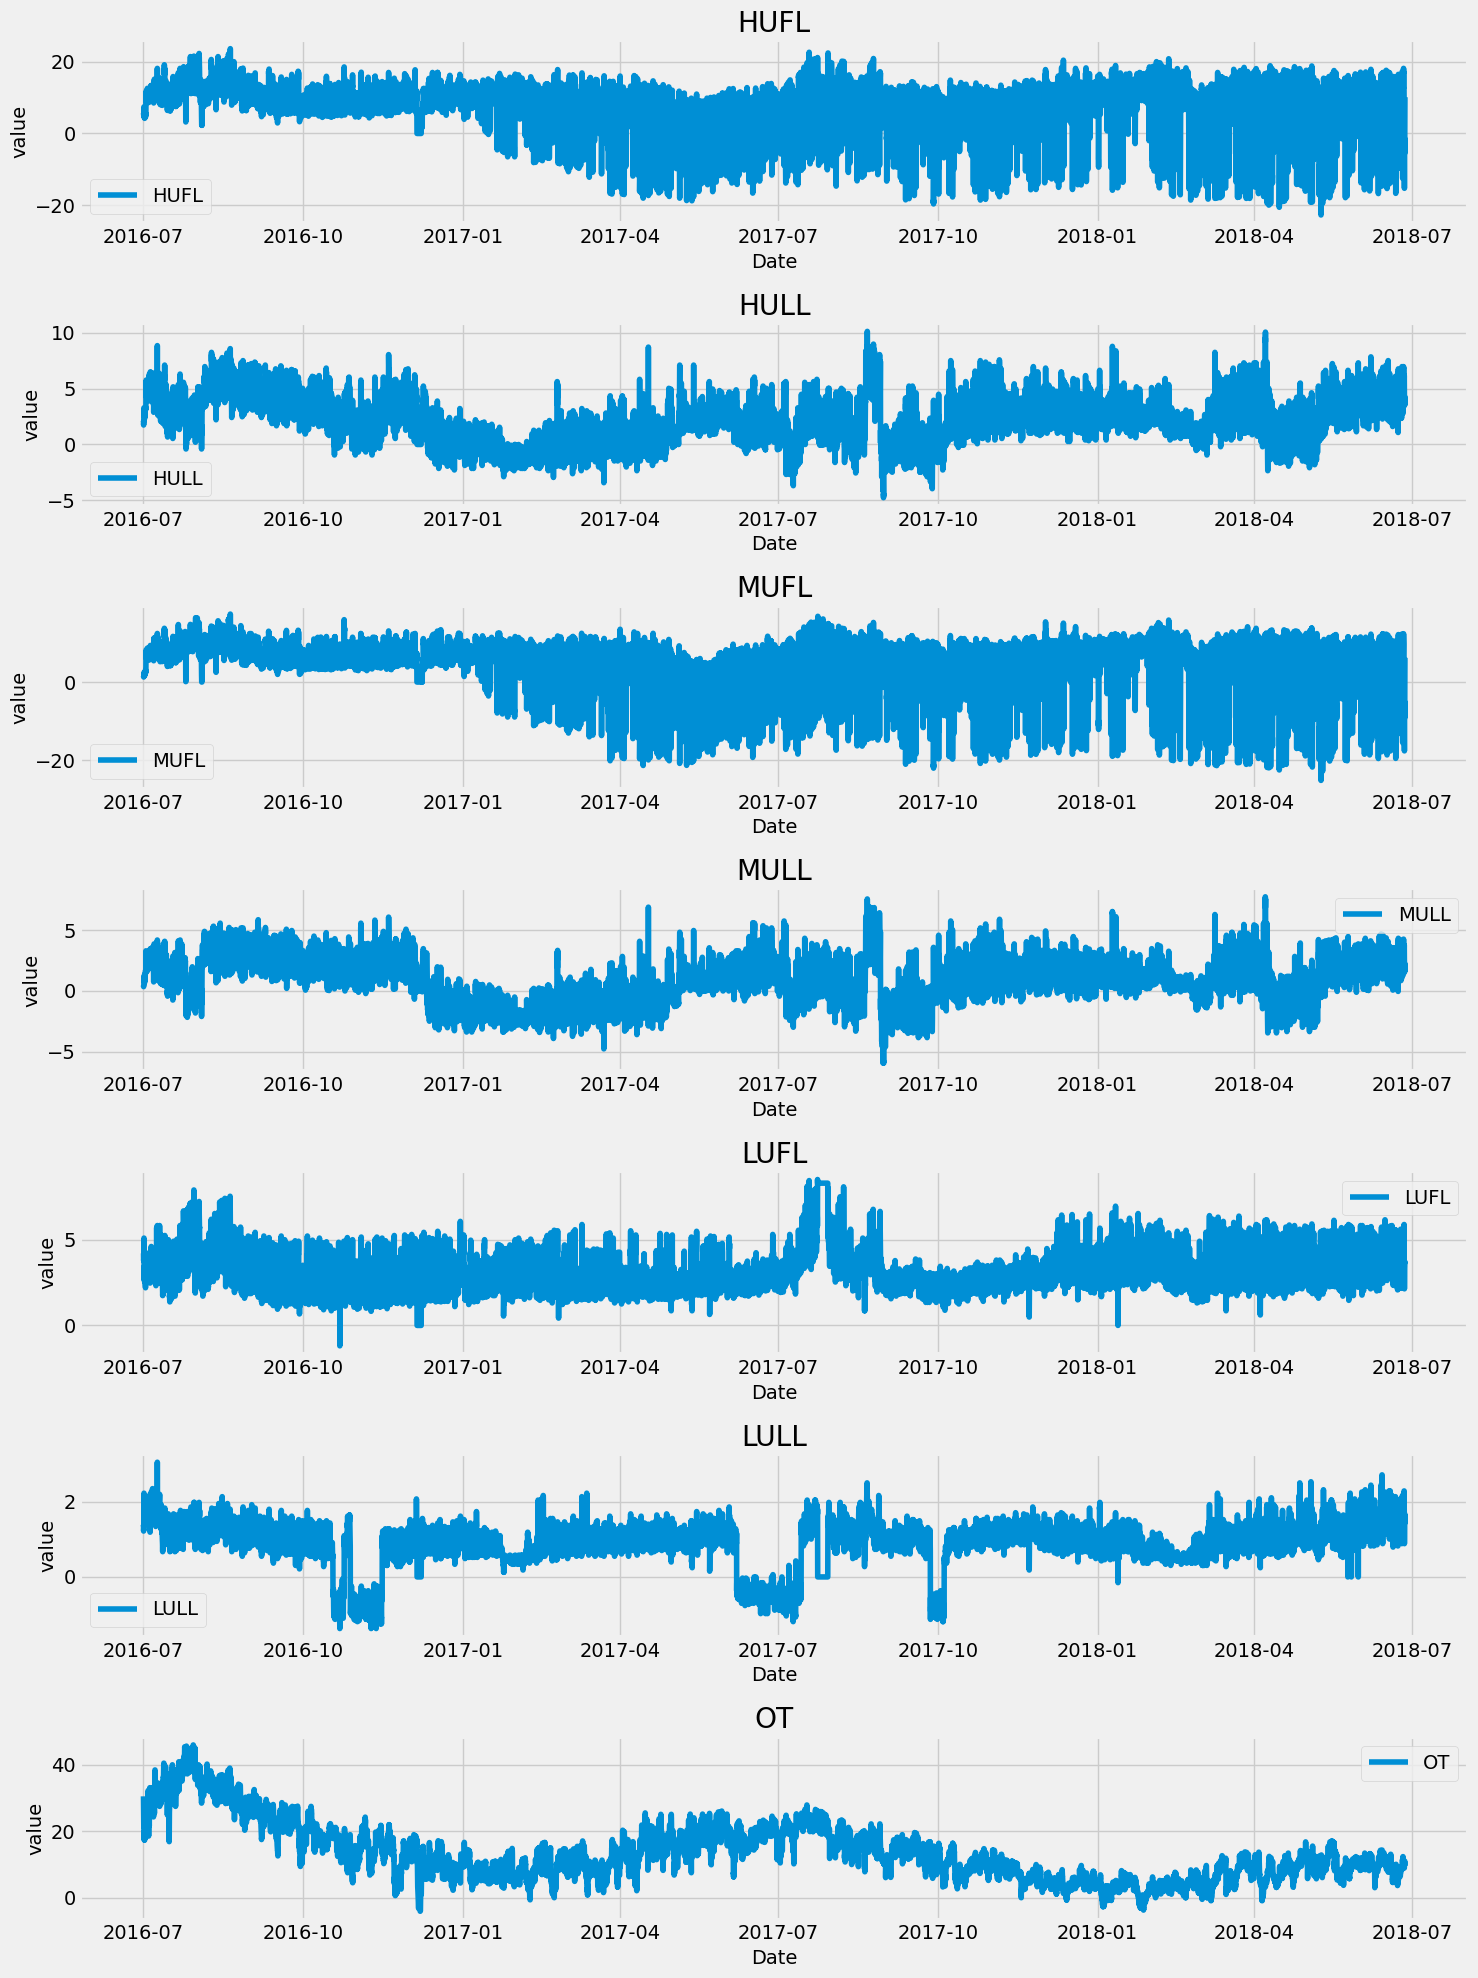

In [ ]:
#multiplot
fig, axes = plt.subplots (nrows =7, ncols =1, figsize = (15,20))
for i, column in enumerate (data.columns[1:]):
  axes[i].plot(data['date'], data[column], label = column)
  axes[i].set_title (column)
  axes[i].set_xlabel ("Date", size = 14)
  axes[i].set_ylabel ("value", size =14)
  axes[i].grid(True)
  axes[i].legend()
plt.tight_layout()
plt.show()

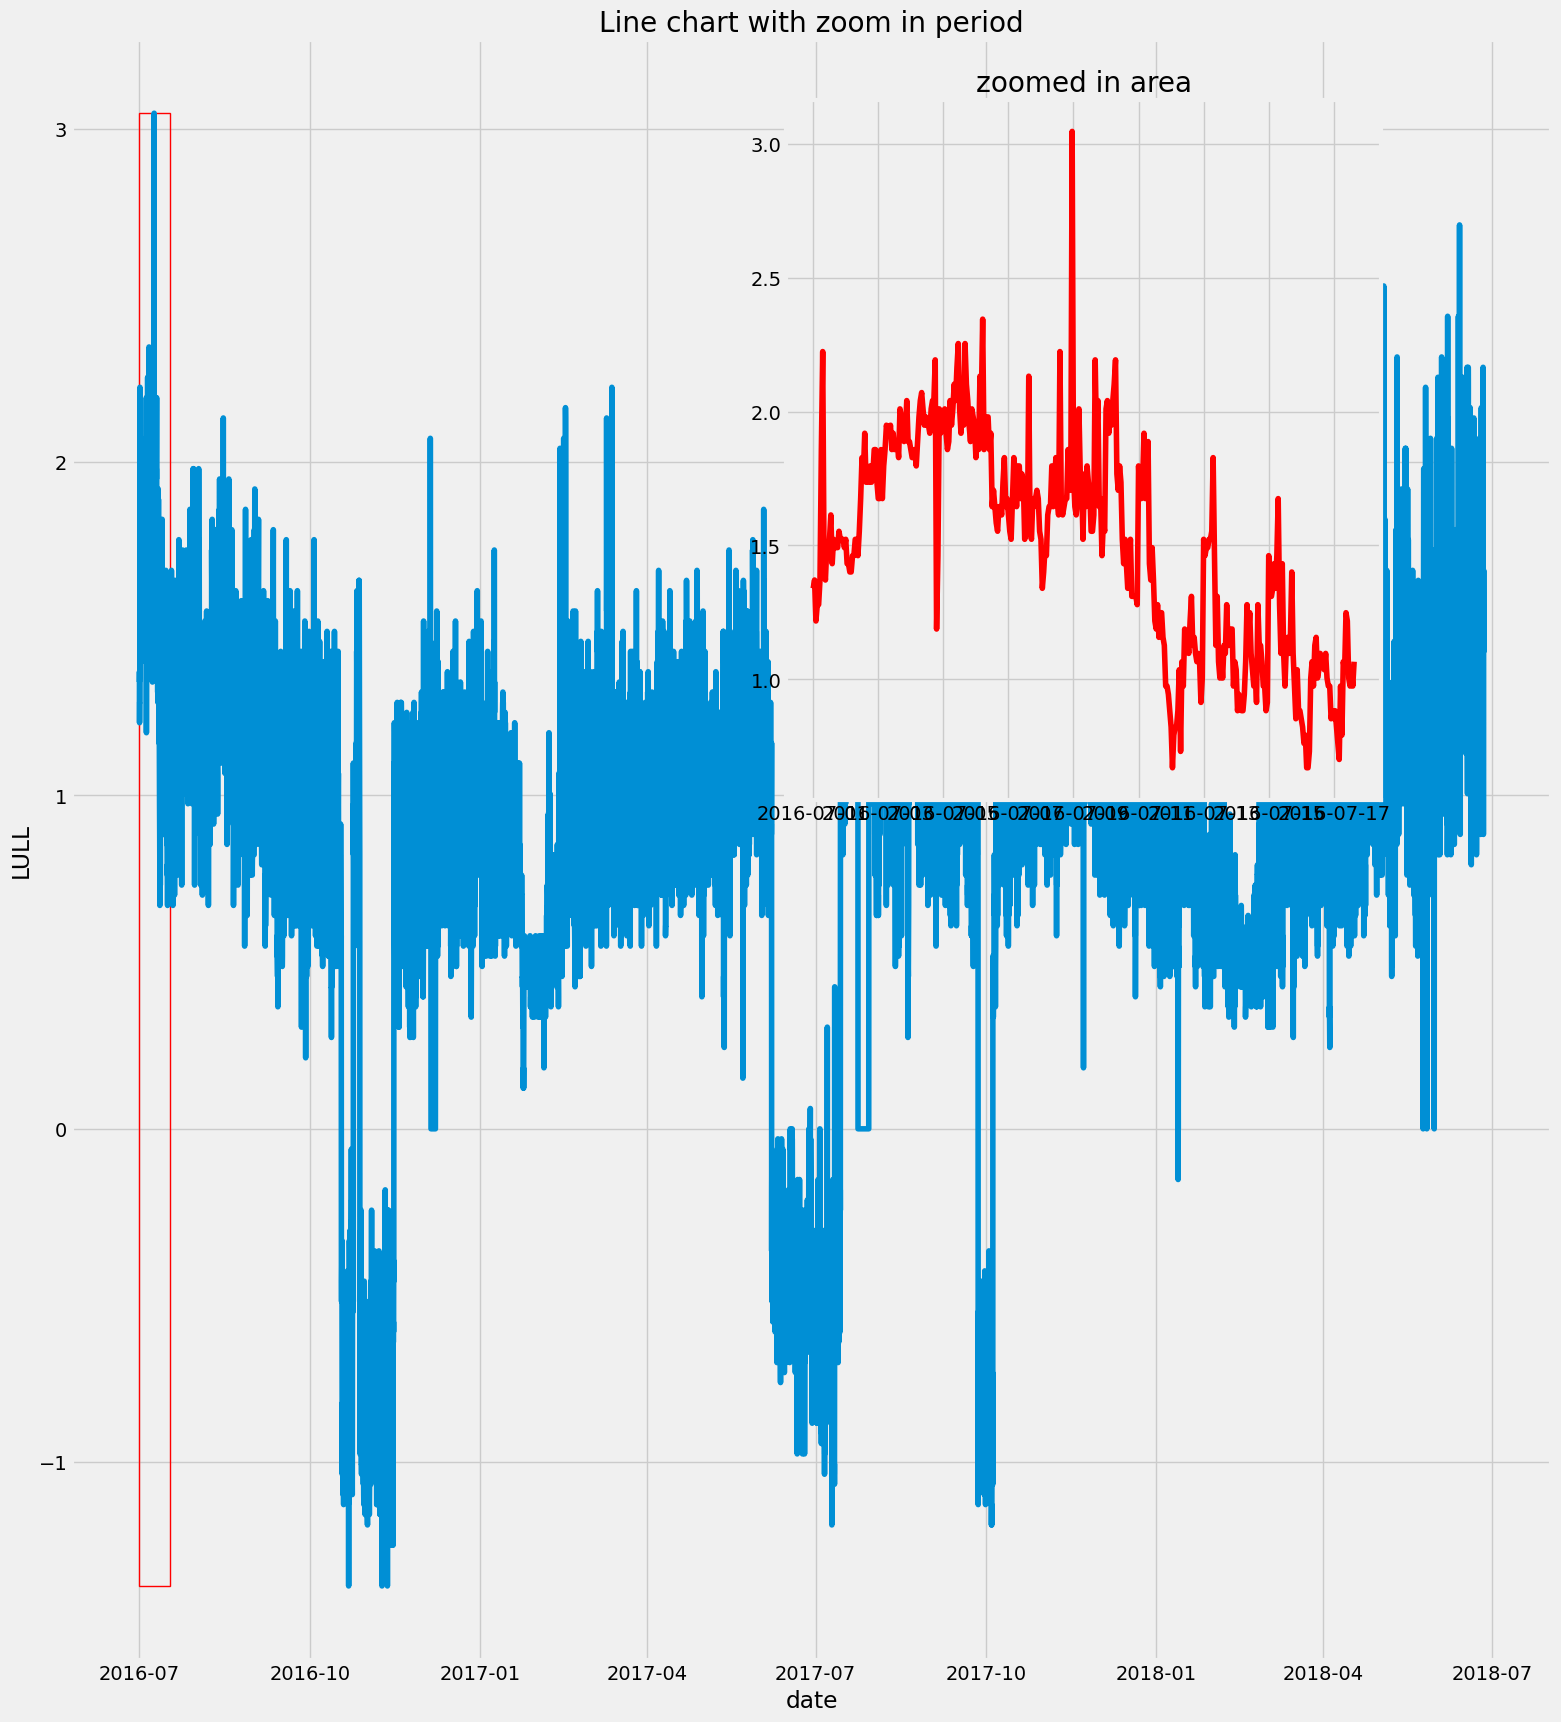

In [ ]:
#line chart with zoom in period
start =0
end = 400
fig, ax = plt.subplots (figsize = (17,20))
ax.plot (data["date"], data["LULL"],label = "LULL" )
#khung chữ nhật highlight phần zoom in
rect = plt.Rectangle ((data['date'][start], min (data["LULL"])),
                      data['date'][end]-data['date'][start],
                      max(data['LULL'])-min (data['LULL']),
                      linewidth =1, edgecolor = 'r', facecolor = 'none')
ax.add_patch (rect)
#creat inset plot
ax_inset = fig.add_axes ([0.5,0.5,0.35,0.35])
ax_inset.plot(data['date'][start:end], data['LULL'][start:end],color = 'r' )
ax_inset.set_title ('zoomed in area')
ax.set_xlabel ("date")
ax.set_ylabel("LULL")
ax.set_title ("Line chart with zoom in period")
plt.show()

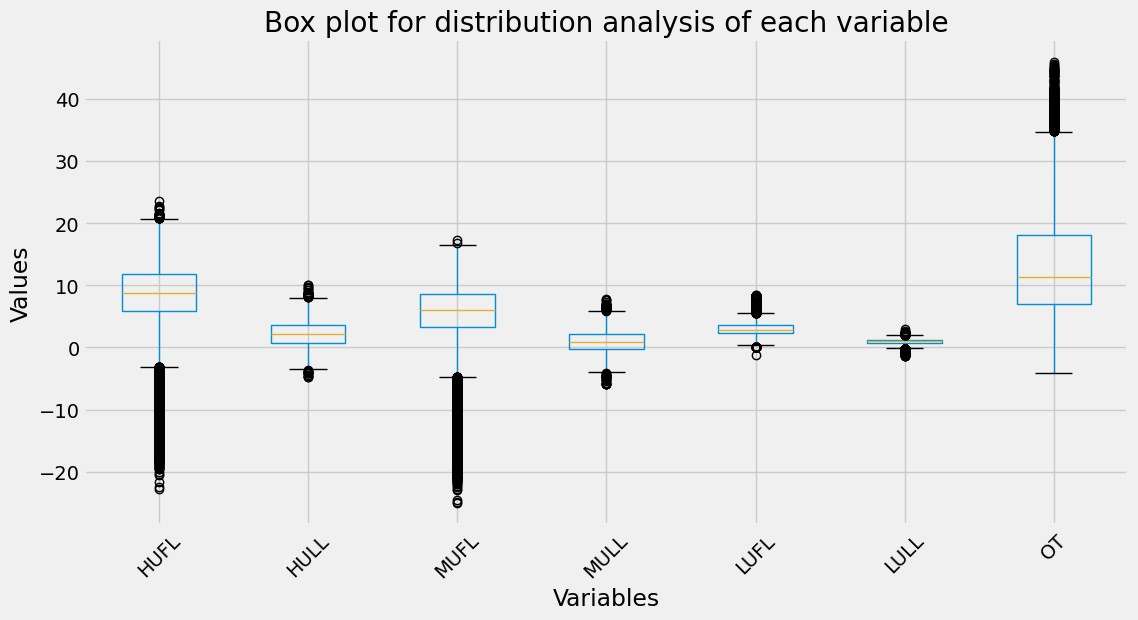

In [ ]:
#box plot
plt.figure (figsize = (12,6))
data.boxplot (column = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"])
plt.xlabel ("Variables")
plt.ylabel ("Values")
plt.title ("Box plot for distribution analysis of each variable")
plt.xticks (rotation = 45)
plt.show()

In [ ]:
#use pyplot
fig = px.box (data,x = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"] )
fig.show()

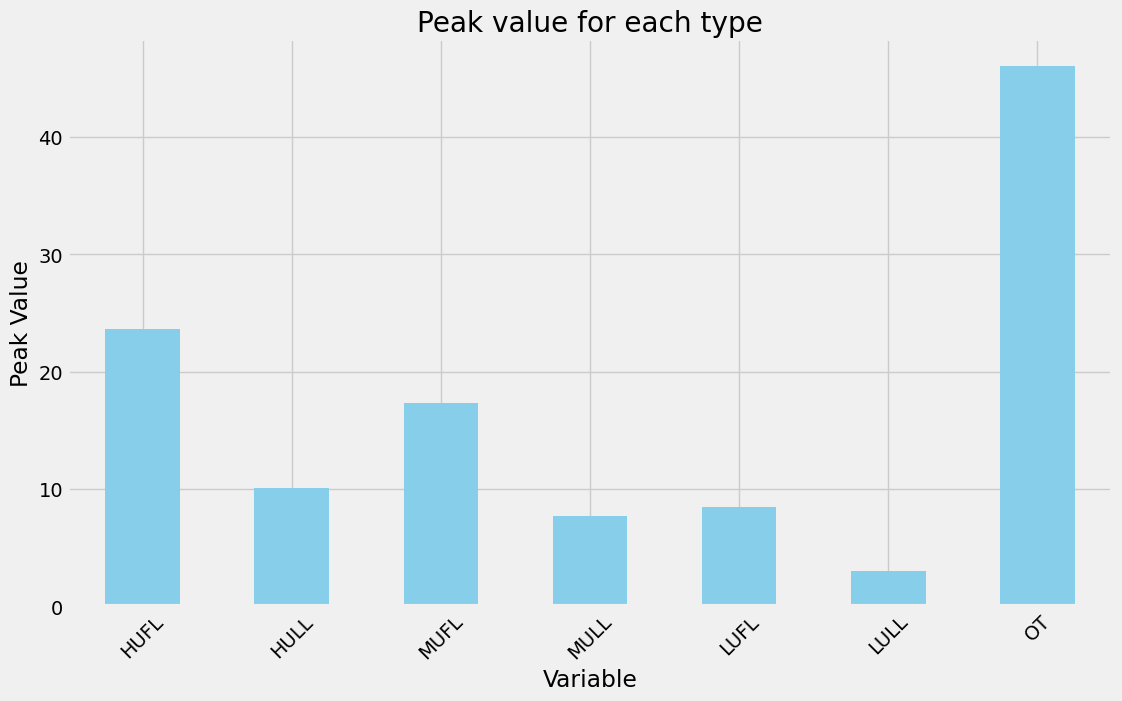

In [ ]:
#bar chart
peak_values = data.max()
peak_times = data.idxmax()
peak_analysis = pd.DataFrame ({"Peak Value": peak_values, "Peak Time": peak_times})
peak_analysis = peak_analysis.drop ('date')
plt.figure (figsize = (12,7))
peak_analysis ['Peak Value'].plot (kind = 'bar', color = "skyblue")
plt.title ("Peak value for each type")
plt.xlabel ('Variable')
plt.ylabel ("Peak Value")
plt.xticks (rotation =45)
plt.show()

<Figure size 1200x700 with 0 Axes>

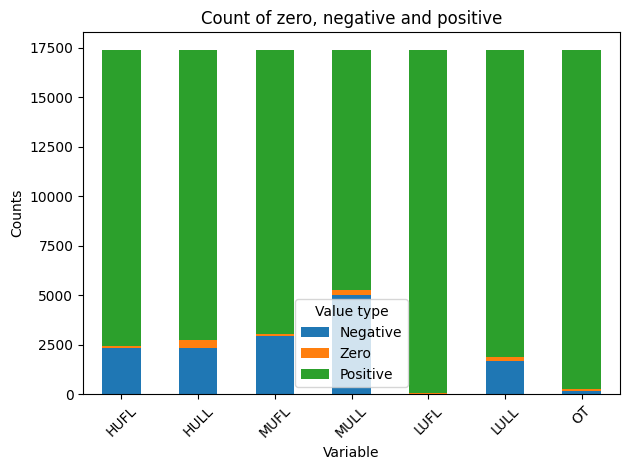

In [6]:
#bar chart nang cao cho biet thuoc tinh, chiem dong
counts = {column: [
    np.sum (data[column]<0),
    np.sum (data[column]==0),
    np.sum (data[column]>0)
]
    for column in data.columns [1:] }

counts_data = pd.DataFrame (counts, index = ["Negative", "Zero", "Positive"]).T
plt.figure (figsize = (12,7))
counts_data.plot (kind = 'bar',stacked = True)
plt.title ("Count of zero, negative and positive")
plt.xlabel ('Variable')
plt.ylabel ("Counts")
plt.xticks (rotation =45)
plt.legend (title = "Value type")
plt.tight_layout()
plt.show()

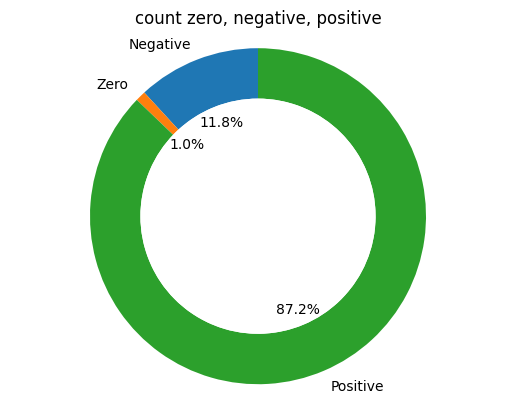

In [7]:
#donut chart:
counts_for_donut = counts_data.sum()
fig, ax = plt.subplots()
ax.pie (counts_for_donut, labels = counts_for_donut.index, autopct = '%1.1f%%', startangle = 90, wedgeprops = dict (width =0.3))
#draw circle at center to create donut hole
centre_circle = plt.Circle ((0,0),0.70, fc = 'white')
fig.gca ().add_artist (centre_circle)

#equal aspect ratio make sure that pie is drawn as a circle
ax.axis ('equal')
plt.title ('count zero, negative, positive')
plt.show()

<Axes: >

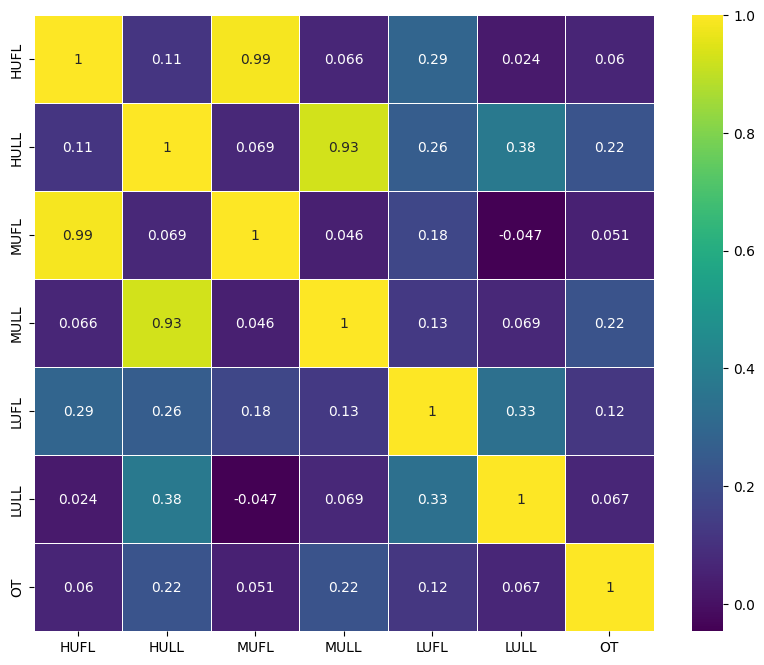

In [9]:
#heatmap use seaborn
corr_matrix = data.corr (numeric_only = True)
plt.figure (figsize = (10,8))
sns.heatmap (corr_matrix, annot = True, cmap = 'viridis', linewidths = 0.5)

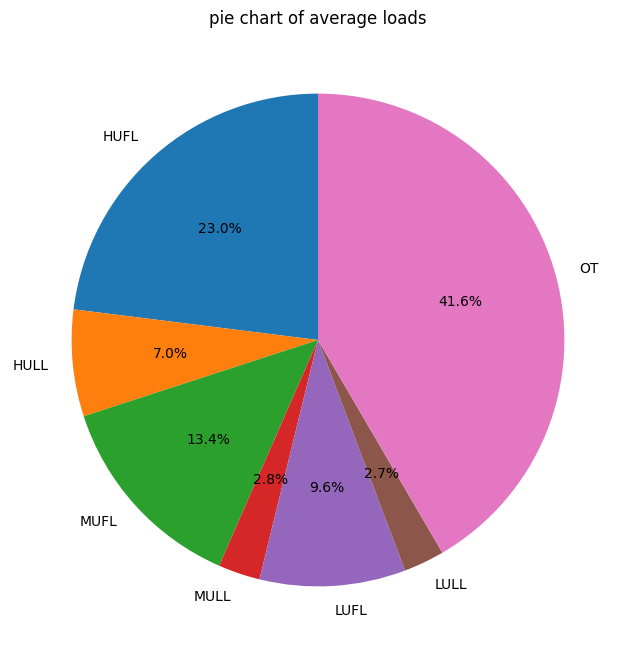

In [14]:
#pie chart
average_loads = data[["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"]].mean()
plt.figure (figsize = (8,8))
plt.pie (average_loads, labels = average_loads.index, autopct = "%1.1f%%", startangle =90)
plt.title ("pie chart of average loads")
plt.show()

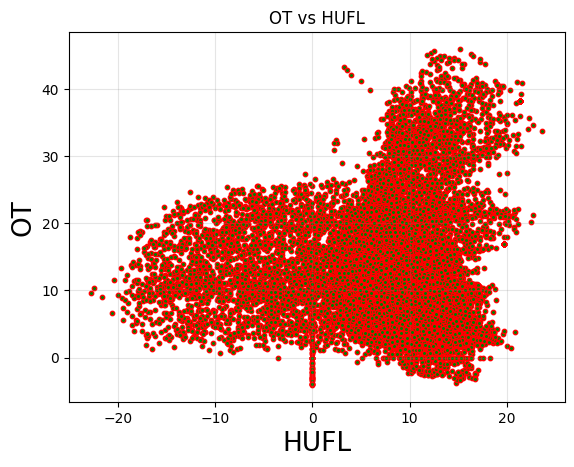

In [15]:
#scatter
plt.scatter (data.HUFL, data.OT, marker = 'o', color = 'green', linewidths =1, edgecolors = 'red', s =10)
plt.style.use ('fivethirtyeight')
plt.xlabel ('HUFL', size =19, color = 'black')
plt.ylabel ('OT', size =19, color = 'black')
plt.title ('OT vs HUFL', size =12, color = 'black')
plt.xticks (color = 'black')
plt.yticks (color = 'black')
plt.grid (color = 'grey', alpha = 0.2)
plt.show()

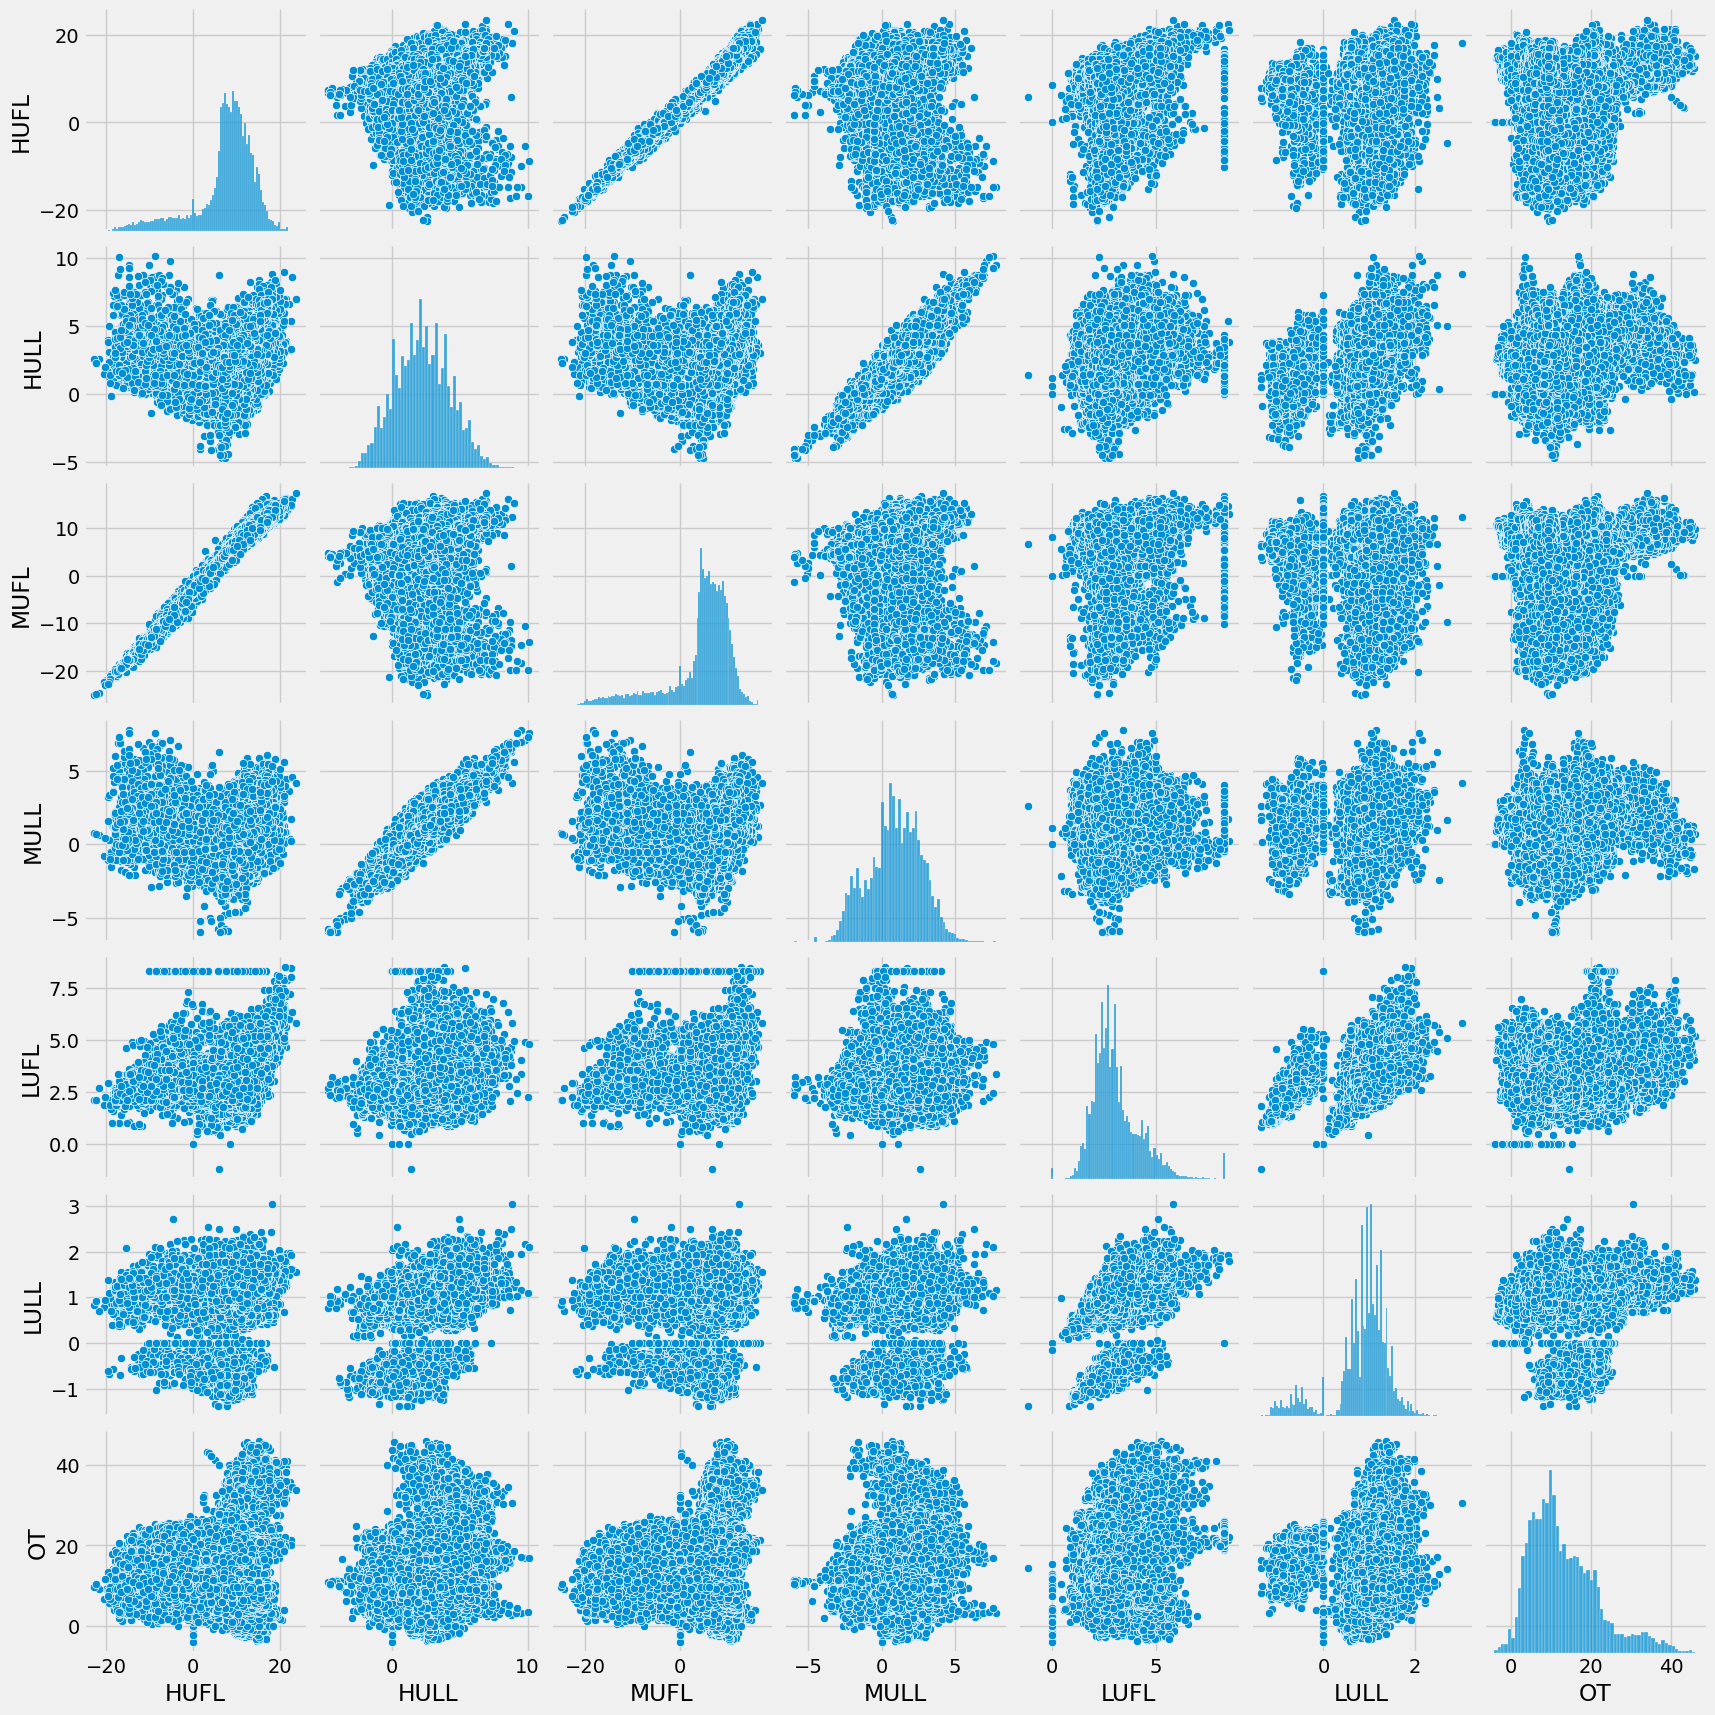

In [16]:
#pairplot: ket hop confusion matrix va scatter
sns.pairplot (data)

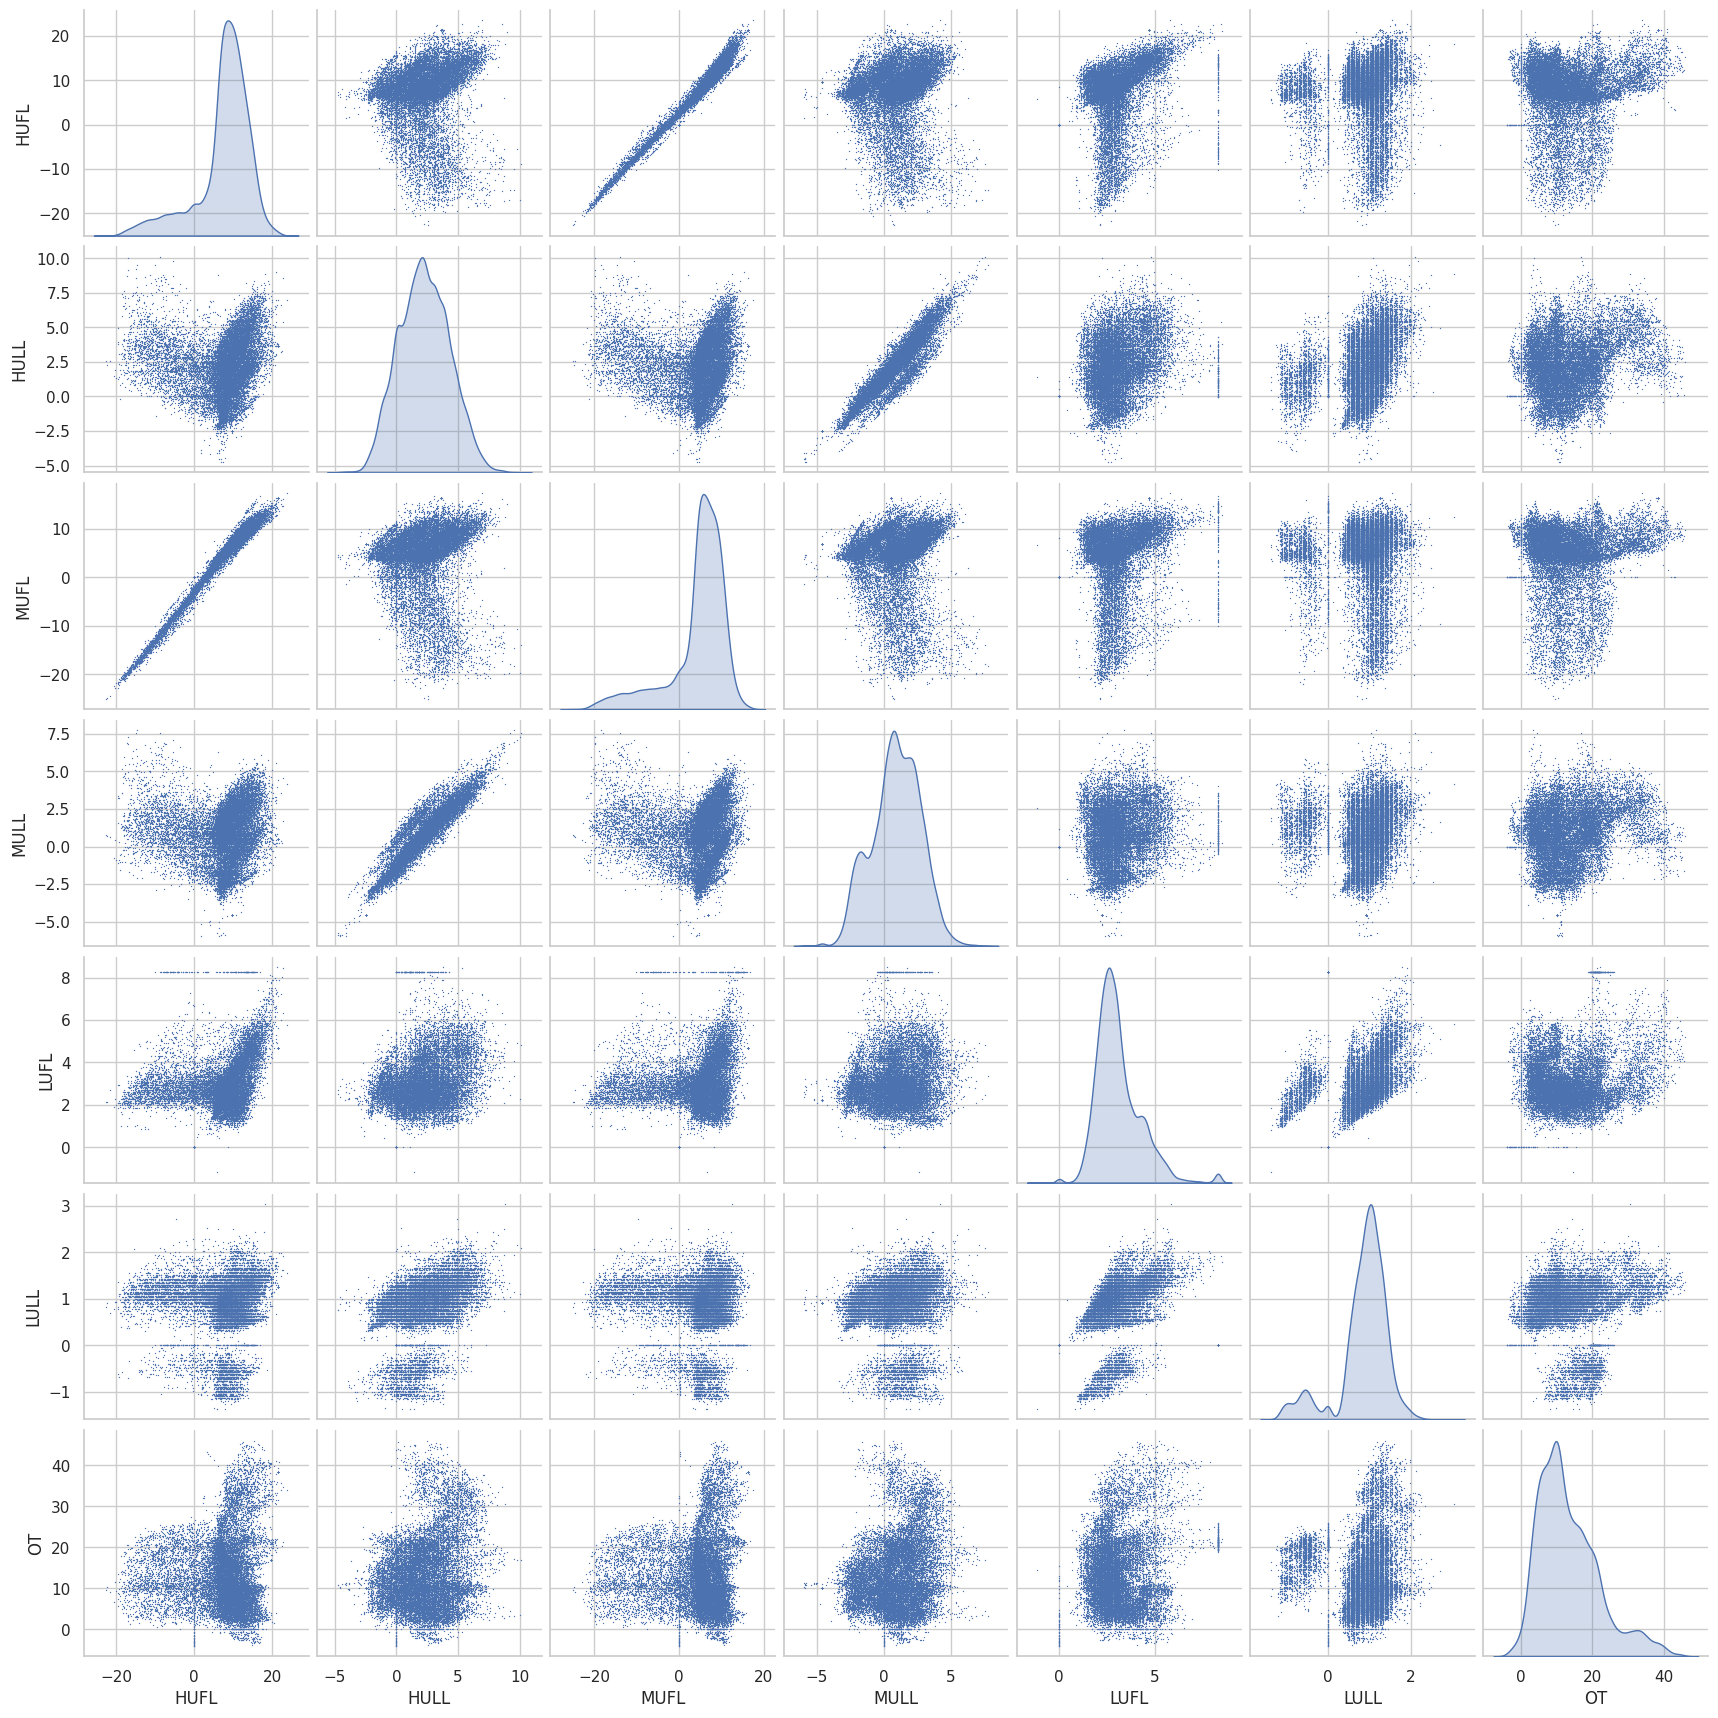

In [17]:
sns.set (style = 'whitegrid')
pair_plot = sns.pairplot (data, diag_kind = 'kde', #kernel density estimate for  diagonal
                          markers = 'o',
                          plot_kws = dict (linewidth = 0, s = 0.9),
                          diag_kws = dict (fill = True))
sns.despine()

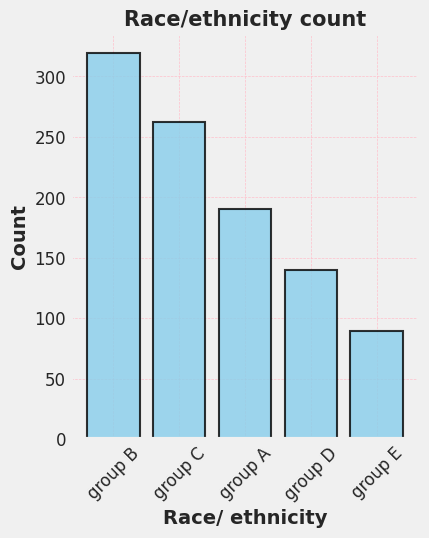

In [23]:
#bar chart for student performance
fig = plt.figure (figsize = (4,5))
plt.style.use ("fivethirtyeight")
plt.bar(
    x = student_performance ['race/ethnicity'].unique(),
    height = student_performance ['race/ethnicity'].value_counts().to_list(),
    color = 'skyblue',
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.8
)
plt.xlabel ('Race/ ethnicity', fontsize =14, fontweight = 'bold')
plt.ylabel ('Count', fontsize = 14, fontweight = 'bold')
plt.title ('Race/ethnicity count', fontsize =15, fontweight = 'bold')
plt.xticks (fontsize =12, rotation = 45)
plt.yticks (fontsize =12)
plt.grid (True, linestyle = '--', linewidth = 0.5, color = 'pink')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

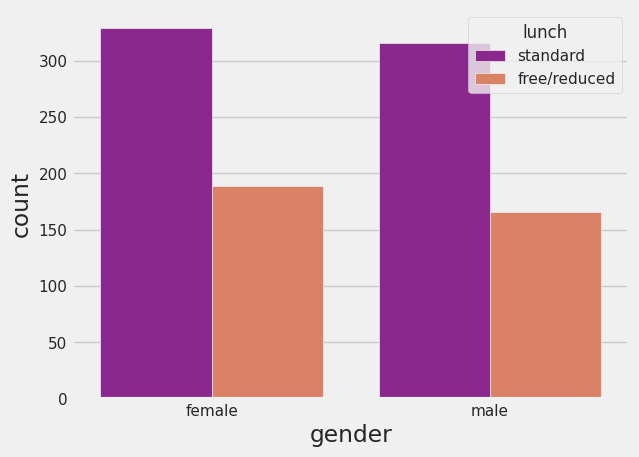

In [27]:
sns.countplot (data = student_performance, x = 'gender' ,hue = 'lunch', palette = 'plasma' )

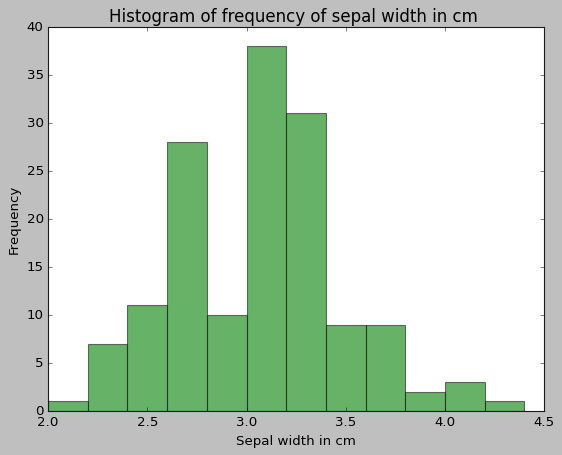

In [30]:
#histogram: show frequency of the variable for a particular interval.
bin_width = 0.2
bins = int ((iris.SepalWidthCm.max()-iris.SepalWidthCm.min())/bin_width)
plt.style.use ('classic')
plt.hist (iris.SepalWidthCm, bins = bins, color = 'green', alpha = 0.6, orientation = 'vertical', rwidth =1)
plt.xlabel ('Sepal width in cm', size =12, color = 'black')
plt.ylabel ('Frequency', size = 12, color = 'black')
plt.title ('Histogram of frequency of sepal width in cm ', size =15, color = 'black')
plt.xticks (color ='black')
plt.yticks (color ='black')
plt.show()


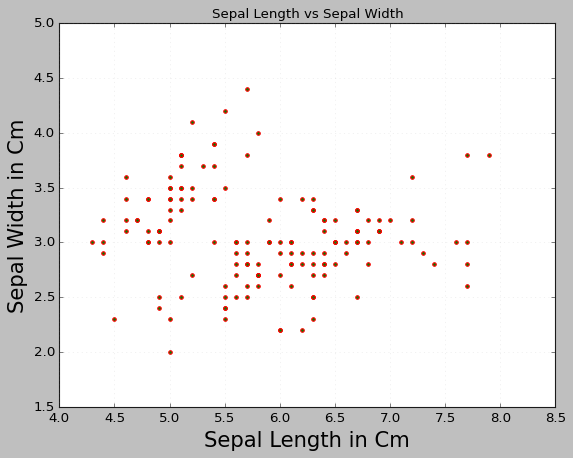

In [31]:
plt.scatter (iris.SepalLengthCm, iris.SepalWidthCm, marker = 'o', color = 'green', linewidths =1, edgecolors = 'red', s =10)
plt.style.use ('fivethirtyeight')
plt.xlabel ('Sepal Length in Cm', size =19, color = 'black')
plt.ylabel ('Sepal Width in Cm', size =19, color = 'black')
plt.title ('Sepal Length vs Sepal Width', size =12, color = 'black')
plt.xticks (color = 'black')
plt.yticks (color = 'black')
plt.grid (color = 'grey', alpha = 0.2)
plt.show()

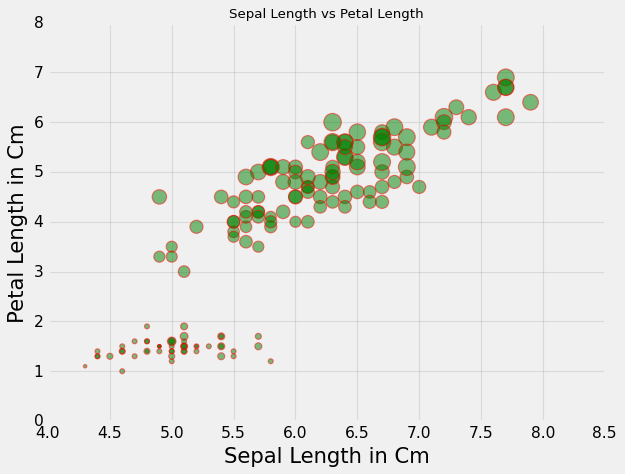

In [33]:
#bubble chart: scatter plot but used to observve the relation between 3 variables. The size of bubble correspond to the third variable
from sklearn.preprocessing import MinMaxScaler
sizes = iris['PetalWidthCm']/ iris ['PetalWidthCm'].max()
plt.scatter (iris.SepalLengthCm, iris.PetalLengthCm, marker = 'o', color = 'green', linewidths =1, edgecolors = 'red', s =sizes*250, alpha = 0.5)
plt.style.use ('fivethirtyeight')
plt.xlabel ('Sepal Length in Cm', size =19, color = 'black')
plt.ylabel ('Petal Length in Cm', size =19, color = 'black')
plt.title ('Sepal Length vs Petal Length', size =12, color = 'black')
plt.xticks (color = 'black')
plt.yticks (color = 'black')
plt.grid (color = 'grey', alpha = 0.2)
plt.show()